#Basic import

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
data = pd.read_csv("Titanic-Dataset.csv")

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Exploratory Data Analysis

In [34]:
data.info()
#891 total entries
#Cabin details is highly sparse and some age entries missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data.groupby("Sex")["PassengerId"].count()
#Male - 577
#Female - 314

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [36]:
data['Gender'] = data['Sex'].map({'male' : 0, 'female' : 1})

In [37]:
#Assigning missing values using Gradient Boosting Machine

from sklearn.ensemble import GradientBoostingRegressor

not_missing = data[data['Age'].notnull()]

features = ['Pclass', 'SibSp', 'Parch', 'Gender']
target = 'Age'

regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
regressor.fit(not_missing[features], not_missing[target])

data.loc[data['Age'].isnull(), 'Age'] = abs(regressor.predict(data.loc[data['Age'].isnull(), features]))

Visualizing the general distribution of passengers based on various parameters

In [38]:
#Understanding age distribution for available data

data['Age'].min() #0.42
data['Age'].max() #80.0

80.0

Text(0.5, 1.0, 'Distribution of passengers by age')

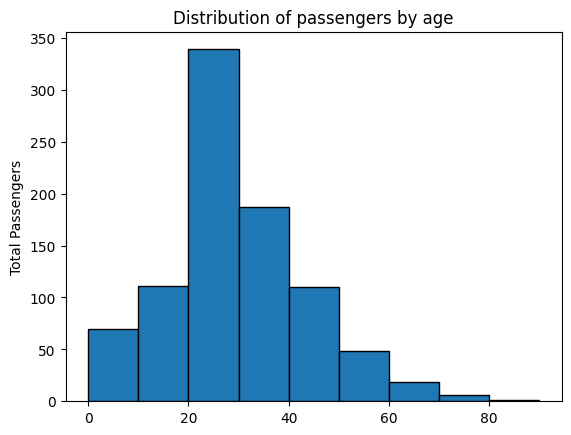

In [39]:
age_classes = [0,10,20,30,40,50,60,70,80,90]
plt.hist(data['Age'],bins = age_classes,edgecolor = 'black') #Most passengers were between 20-30
plt.ylabel("Total Passengers")
plt.title("Distribution of passengers by age")

Text(0.5, 1.0, 'Class distribution')

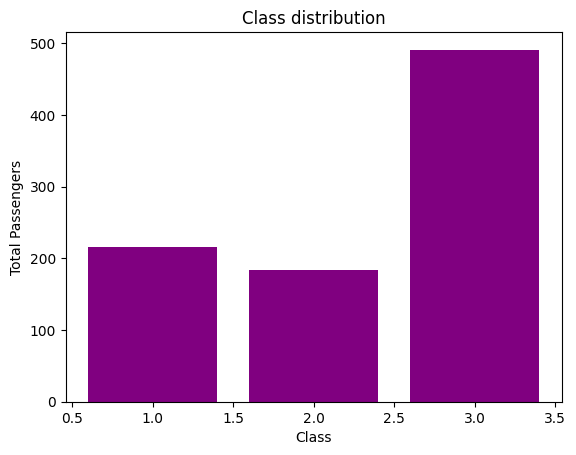

In [40]:
#Visualizing class distribution

data['Pclass'].nunique() #Three class of tickets
classes = data['Pclass'].value_counts()
plt.bar(classes.index,classes,color = 'purple')
plt.xlabel("Class")
plt.ylabel("Total Passengers")
plt.title("Class distribution")

In [41]:
survived = data[data.apply(lambda x: x['Survived'] == 1, axis=1)]
survived['PassengerId'].count()/data['PassengerId'].count()*100 #38.38% of passengers survived the wreckage

38.38383838383838

In [42]:
print(data['Survived'].value_counts()) #The dataset is considerably imbalanced

0    549
1    342
Name: Survived, dtype: int64


#Logistic Regression

In [43]:
model_performance = pd.DataFrame(columns = ['Algorithm','F1-Score','ROC-AUC Score'])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['Pclass','Age','Gender']]
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import roc_auc_score,f1_score
lr_score = roc_auc_score(y_test,y_pred)
lr_score_f1 = f1_score(y_test,y_pred)

row = {'Algorithm' : 'Logistic Regression', 'F1-Score' : lr_score_f1, 'ROC-AUC Score' : lr_score}

model_performance.loc[len(model_performance)] = row

<Axes: >

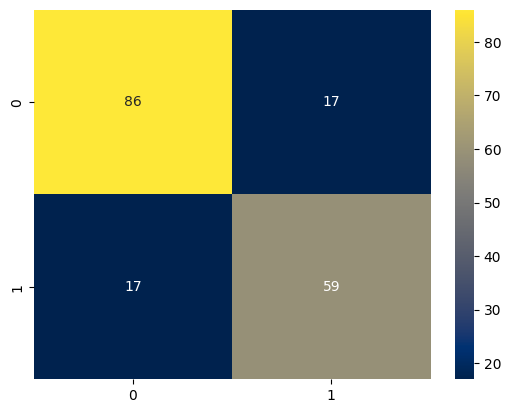

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True, cmap = 'cividis')

#Decision Tree Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()

dtmodel.fit(X_train,y_train)

dt_pred = dtmodel.predict(X_test)

In [48]:
dt_score = roc_auc_score(y_test,dt_pred)
dt_score_f1 = f1_score(y_test,dt_pred)

row = {'Algorithm' : 'Decision Tree', 'F1-Score' : dt_score_f1, 'ROC-AUC Score' : dt_score}

model_performance.loc[len(model_performance)] = row

<Axes: >

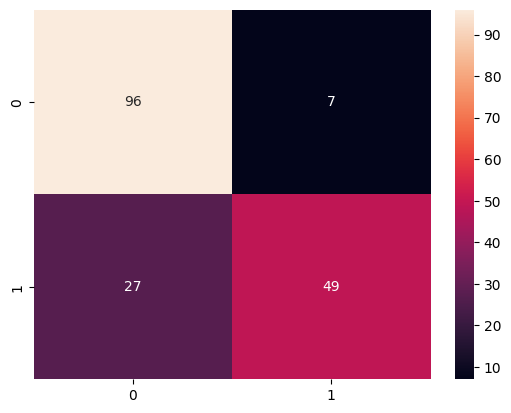

In [49]:
cm2 = confusion_matrix(y_test,dt_pred)
sb.heatmap(cm2, annot = True)

#Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

In [51]:
rf_score = roc_auc_score(y_test,rf_pred)
rf_score_f1 = f1_score(y_test,rf_pred)

row = {'Algorithm' : 'Random Forest', 'F1-Score' : rf_score_f1, 'ROC-AUC Score' : rf_score}

model_performance.loc[len(model_performance)] = row

<Axes: >

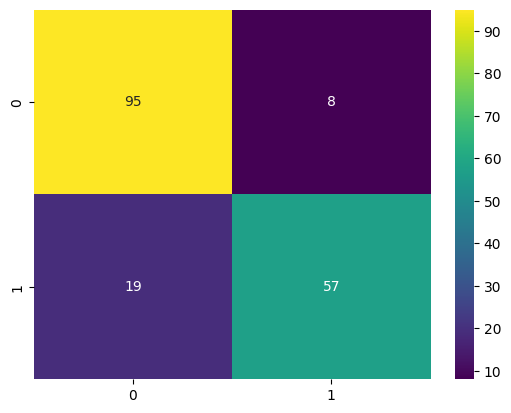

In [52]:
cm3 = confusion_matrix(y_test,rf_pred)
sb.heatmap(cm3,annot = True, cmap = "viridis")

#Comparison of models

In [53]:
model_performance #Thus Random Forest predicts the target class slightly better than the other two models.

,Algorithm,F1-Score,ROC-AUC Score
0,Logistic Regression,0.776316,0.805634
1,Decision Tree,0.742424,0.788388
2,Random Forest,0.808511,0.836165


Text(0.5, 1.0, 'Comparison of F1-Scores of algorithms')

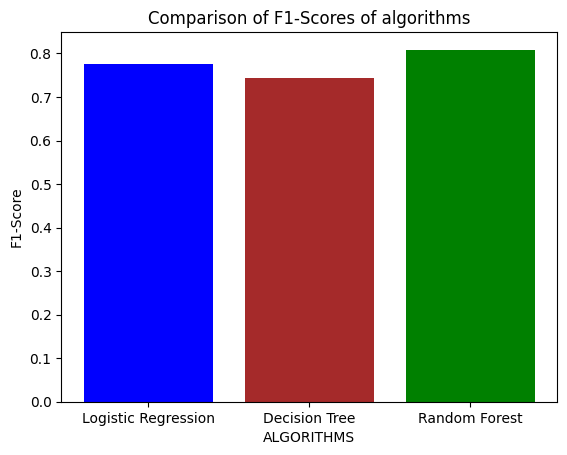

In [54]:
plt.bar(model_performance['Algorithm'],model_performance['F1-Score'],color = ['blue','brown','green'])
plt.xlabel('ALGORITHMS')
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Scores of algorithms')

Text(0.5, 1.0, 'Comparison of ROC-AUC Scores of algorithms')

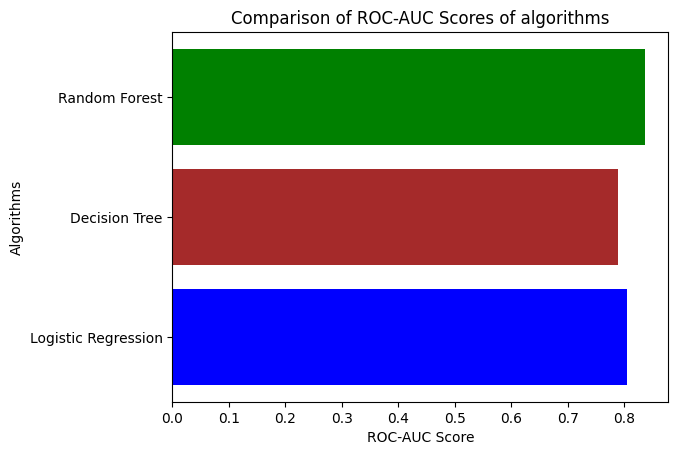

In [55]:
plt.barh(model_performance['Algorithm'],model_performance['ROC-AUC Score'],color = ['blue','brown','green'])
plt.xlabel('ROC-AUC Score')
plt.ylabel('Algorithms')
plt.title('Comparison of ROC-AUC Scores of algorithms')

In [56]:
#Sample predictions

new_data = pd.DataFrame({
    'Pclass' : [3],
    'Age' : [26],
    'Gender' : [1]
})

prediction = rf.predict(new_data)

if prediction == 0:
  print("Not survived")
else:
  print("Survived")

Survived
